In [ ]:
import numpy as np
import pandas as pd
from sklearn import linear_model
from matplotlib import pyplot as plt

In [ ]:
train_data=pd.read_csv('/content/crime_train.csv')
train_data.head()

,ID,population,householdsize,agePct12t21,agePct12t29,agePct16t24,agePct65up,numbUrban,pctUrban,medIncome,...,MedOwnCostPctInc,MedOwnCostPctIncNoMtg,NumInShelters,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,ViolentCrimesPerPop
0,1,14985,2.56,16.55,34.42,22.54,10.13,0,0.0,35545,...,23.3,13.5,0,0,3.32,60.94,47.28,66.65,82.41,428.64
1,2,30843,2.83,15.45,35.12,18.14,4.70,0,0.0,32033,...,21.6,10.9,68,41,4.98,25.24,28.17,52.73,59.20,742.54
2,3,74991,2.52,10.48,20.43,9.11,20.68,73342,97.8,31177,...,23.6,11.9,0,0,6.51,13.69,34.49,60.88,66.97,303.72
3,4,45061,2.44,10.59,24.97,11.61,16.34,45061,100.0,39822,...,24.0,16.3,0,1,13.13,67.79,65.19,84.28,91.32,373.88
4,5,12863,2.45,12.02,22.51,10.49,18.46,0,0.0,23044,...,16.0,11.7,0,0,1.08,80.22,53.17,86.56,93.15,108.07


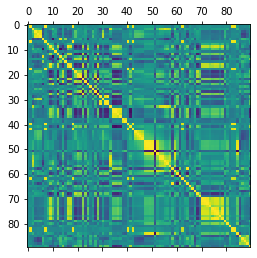

In [ ]:
plt.matshow(train_data.corr())

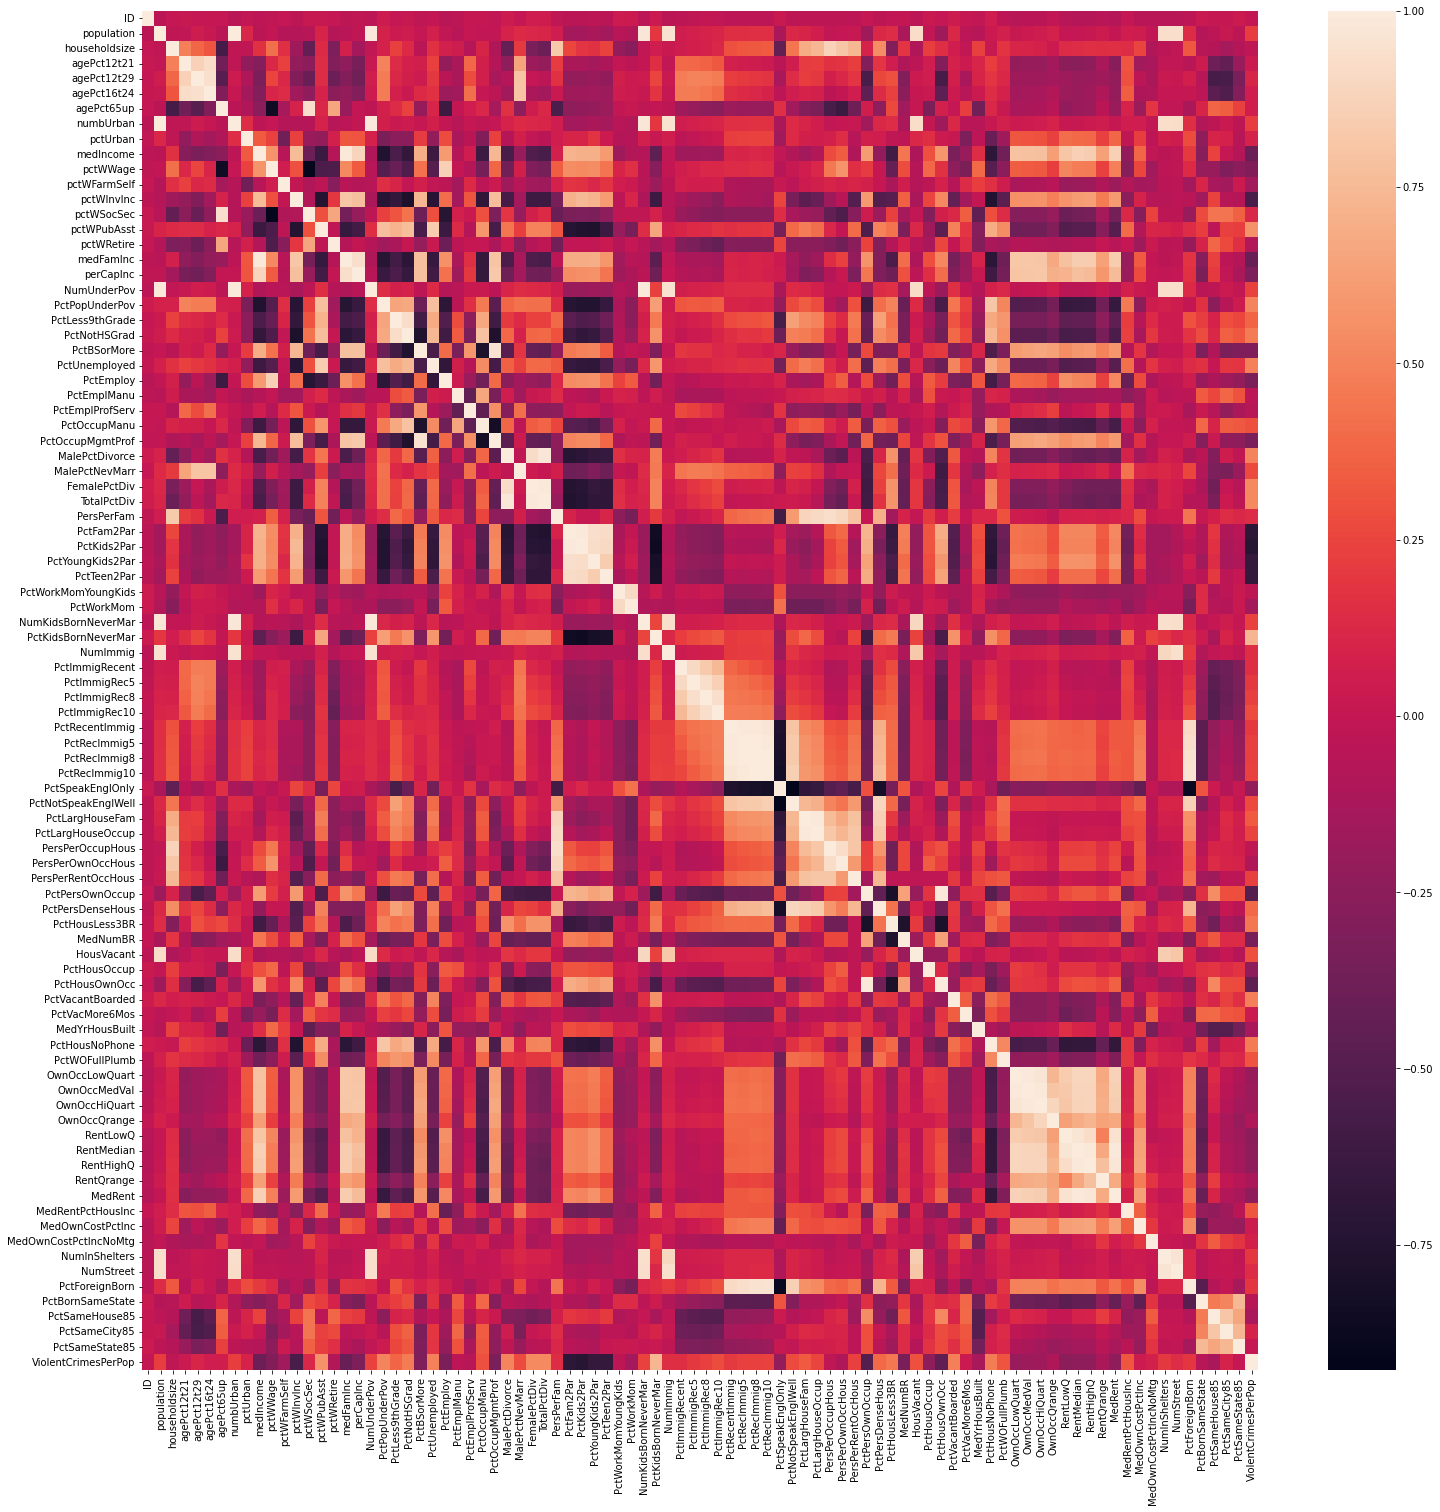

In [ ]:
plt.figure(figsize=(25,25))
sns.heatmap(train_data.corr())

In [ ]:
train_data.corr()

,ID,population,householdsize,agePct12t21,agePct12t29,agePct16t24,agePct65up,numbUrban,pctUrban,medIncome,...,MedOwnCostPctInc,MedOwnCostPctIncNoMtg,NumInShelters,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,ViolentCrimesPerPop
ID,1.000000,-0.041160,0.001029,0.018727,0.000760,0.009829,0.002708,-0.041388,-0.016341,-0.032708,...,-0.056908,-0.050586,-0.054084,-0.046734,-0.034344,0.023806,0.006414,0.006849,0.032665,-0.004179
population,-0.041160,1.000000,-0.022496,-0.009927,0.045043,0.017797,-0.043238,0.999095,0.111554,-0.046075,...,0.048911,-0.009814,0.936154,0.934634,0.141477,-0.073122,-0.033321,0.016540,-0.029615,0.217881
householdsize,0.001029,-0.022496,1.000000,0.483763,0.379829,0.308925,-0.576988,-0.023232,-0.021652,0.171590,...,0.249988,-0.086288,-0.031638,-0.010645,0.328353,-0.058888,-0.074101,-0.133330,-0.061772,-0.018778
agePct12t21,0.018727,-0.009927,0.483763,1.000000,0.869998,0.931654,-0.372707,-0.019164,-0.223157,-0.272725,...,-0.156346,-0.125688,-0.013150,-0.012523,-0.047388,0.043110,-0.379669,-0.437890,-0.196200,0.030544
agePct12t29,0.000760,0.045043,0.379829,0.869998,1.000000,0.946234,-0.484355,0.039503,-0.097625,-0.331684,...,-0.038339,-0.108091,0.026940,0.015310,0.068405,-0.056793,-0.560390,-0.554787,-0.329649,0.108884
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PctBornSameState,0.023806,-0.073122,-0.058888,0.043110,-0.056793,-0.032742,0.100020,-0.079740,-0.232896,-0.269619,...,-0.446422,0.176118,-0.052515,-0.053882,-0.483920,1.000000,0.464480,0.503582,0.744148,-0.058437
PctSameHouse85,0.006414,-0.033321,-0.074101,-0.379669,-0.560390,-0.462341,0.367717,-0.027348,0.102373,0.244224,...,-0.176318,0.343314,-0.003918,-0.001503,-0.072638,0.464480,1.000000,0.805853,0.657308,-0.128448
PctSameCity85,0.006849,0.016540,-0.133330,-0.437890,-0.554787,-0.527472,0.345527,0.021402,0.084095,-0.001073,...,-0.180050,0.223787,0.015410,0.010145,-0.011239,0.503582,0.805853,1.000000,0.736535,0.094995
PctSameState85,0.032665,-0.029615,-0.061772,-0.196200,-0.329649,-0.282046,0.233703,-0.030149,-0.057252,-0.064391,...,-0.203276,0.174392,-0.019938,-0.013631,-0.129574,0.744148,0.657308,0.736535,1.000000,0.002124


In [ ]:
tr=train_data.drop(['ID'],axis=1)

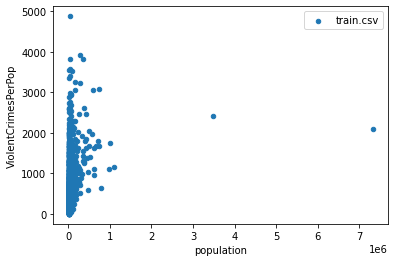

In [ ]:
tr.plot(kind='scatter',x='population',y='ViolentCrimesPerPop',label='train.csv',alpha=1)
plt.show()

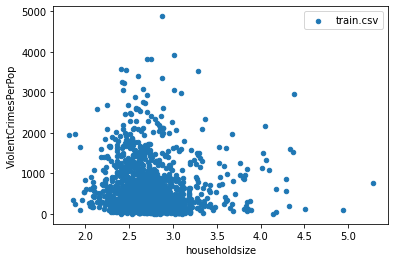

In [ ]:
tr.plot(kind='scatter',x='householdsize',y='ViolentCrimesPerPop',label='train.csv',alpha=1)
plt.show()

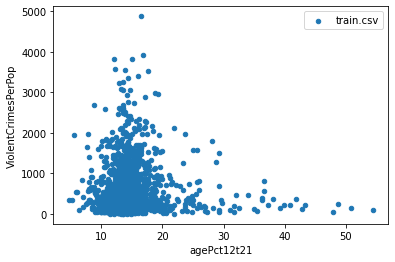

In [ ]:
tr.plot(kind='scatter',x='agePct12t21',y='ViolentCrimesPerPop',label='train.csv',alpha=1)

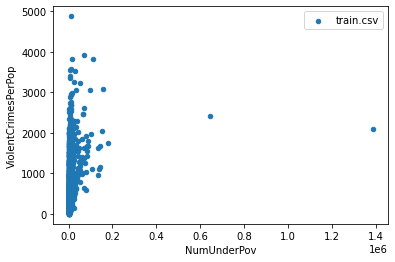

In [ ]:
tr.plot(kind='scatter',x='NumUnderPov',y='ViolentCrimesPerPop',label='train.csv',alpha=1)
plt.show()

In [ ]:
y=tr['ViolentCrimesPerPop']
x=tr.drop(['ViolentCrimesPerPop'],axis=1)

In [ ]:
regr=linear_model.LinearRegression()
regr.fit(x,y)

LinearRegression()

In [ ]:
vals=regr.get_params()

In [ ]:
print(vals)

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': 'deprecated', 'positive': False}


In [ ]:
print(regr.coef_)
print(regr.intercept_)

[ 7.14919936e-04  1.23800100e+01 -8.28000652e+00 -3.58840708e+01
  3.34549393e+01 -1.30305450e+01 -8.54932516e-04  1.41109567e+00
 -2.27552750e-02 -7.00821090e+00  2.95727019e+01 -6.67902639e+00
  1.15458646e+01  8.82161707e+00 -8.30115048e+00  1.83594413e-02
 -4.98509797e-03 -2.78001000e-03 -2.94824284e+00 -1.43136672e+01
  4.97783566e+00  1.75724402e+00 -1.30374690e+00  1.20918533e+01
 -4.06281211e+00  2.15366190e+00 -4.99653775e-01  4.22547268e+00
  2.00271997e+02 -2.07777399e+00  1.43816056e+02 -3.32259909e+02
 -4.05926926e+02 -2.43207388e+00 -1.93158681e+01  2.92604083e+00
 -7.24481971e-01  3.29895767e+00 -1.01925764e+01 -1.42096878e-03
  5.64015457e+01  8.53412360e-04  2.72361194e+00 -1.48151566e+00
 -1.37678352e-03  1.12487361e+00 -4.05246604e+01 -1.47028063e+01
  1.30649975e+01  6.46421199e-01  2.32781012e+00 -1.30391028e+01
  4.72734257e+01 -7.20762077e+01  3.65621264e+02  6.07187018e+02
 -3.58006983e+02 -5.18526869e+01  2.25870300e+01  3.33424415e+00
  5.68650282e+01  2.26150

In [ ]:
y_pred=regr.predict(x)

In [ ]:
from sklearn.metrics import mean_squared_error as mse

In [ ]:
ms_report=mse(y_pred,y)

In [ ]:
print(ms_report)

125748.934553103


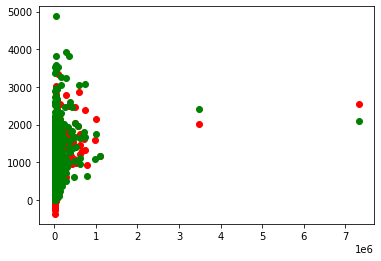

In [ ]:
plt.figure()
plt.scatter(x['population'],y_pred,color='red')
plt.scatter(x['population'],y,color='green')
plt.show()

In [ ]:
#import seaborn as sns
#sns.regplot(x['population'],y)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


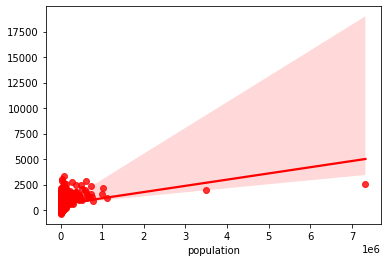

In [ ]:
import seaborn as sns
sns.regplot(x['population'],y_pred,color='red')

In [ ]:
test_data=pd.read_csv("/content/crime_test.csv")

In [ ]:
test_data.head()

,ID,population,householdsize,agePct12t21,agePct12t29,agePct16t24,agePct65up,numbUrban,pctUrban,medIncome,...,MedRentPctHousInc,MedOwnCostPctInc,MedOwnCostPctIncNoMtg,NumInShelters,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85
0,1,11874,2.11,10.54,30.87,14.08,8.16,11874,100.0,30141,...,22.9,19.2,11.4,2,1,7.02,51.78,39.89,75.63,83.39
1,2,14143,2.68,21.01,33.35,21.95,14.55,0,0.0,23886,...,30.5,21.0,14.9,0,0,2.35,75.91,51.79,72.20,88.40
2,3,34882,2.32,12.56,21.79,11.29,19.51,34881,100.0,21053,...,26.5,16.9,11.8,0,9,1.61,74.43,62.60,86.35,90.85
3,4,29885,3.53,20.10,34.33,18.31,8.18,29885,100.0,18956,...,26.2,19.8,13.8,0,0,18.46,68.90,52.42,83.01,90.76
4,5,935933,2.86,15.89,30.35,14.98,9.50,935927,100.0,23584,...,25.3,20.9,12.7,698,44,9.35,69.25,51.62,83.78,90.95


In [ ]:
testdt=test_data.drop(['ID'],axis=1)

In [ ]:
ytest=regr.predict(testdt)

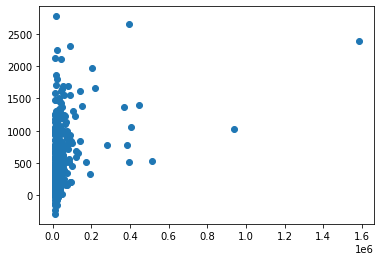

In [ ]:
plt.scatter(testdt['population'],ytest)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


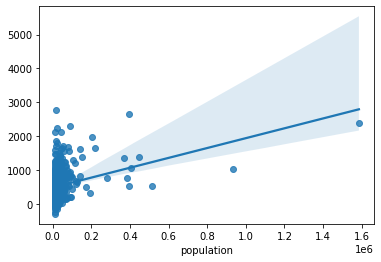

In [ ]:
sns.regplot(testdt['population'],ytest)